<a href="https://colab.research.google.com/github/Dhanuja29/dhanu/blob/new/Image_Classification01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2021-04-19 12:36:41 +00:00)


In [73]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/minor project/images'
CATEGORIES=['cars','spider']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data= np.array(flat_data)
target = np.array(target)
images = np.array(images)


    


time: 39.3 s (started: 2021-04-19 12:36:44 +00:00)


In [74]:
flat_data[0]

array([0.43383987, 0.59462418, 0.77501634, ..., 0.23529412, 0.45882353,
       0.72712418])

time: 6.32 ms (started: 2021-04-19 12:37:23 +00:00)


In [75]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.53 ms (started: 2021-04-19 12:37:23 +00:00)


<BarContainer object of 2 artists>

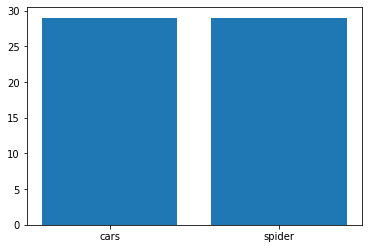

time: 146 ms (started: 2021-04-19 12:37:23 +00:00)


In [76]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 16.9 ms (started: 2021-04-19 12:37:23 +00:00)


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 37.2 s (started: 2021-04-19 12:37:23 +00:00)


In [79]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

time: 78.8 ms (started: 2021-04-19 12:38:00 +00:00)


In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.27 ms (started: 2021-04-19 12:38:00 +00:00)


In [81]:
accuracy_score(y_pred,y_test)

1.0

time: 4.02 ms (started: 2021-04-19 12:38:00 +00:00)


In [82]:
confusion_matrix(y_pred,y_test)

array([[10,  0],
       [ 0,  8]])

time: 4.76 ms (started: 2021-04-19 12:38:00 +00:00)


In [85]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 27.8 ms (started: 2021-04-19 12:52:13 +00:00)


In [86]:
model= pickle.load(open('img_model.p','rb'))

time: 22.9 ms (started: 2021-04-19 12:52:16 +00:00)


Enter your URLhttps://i.pinimg.com/originals/10/66/46/1066461b5705cbd2a4a074dfa7df12e9.jpg
(1500, 1000, 3)
  PREDICTED OUTPUT: cars


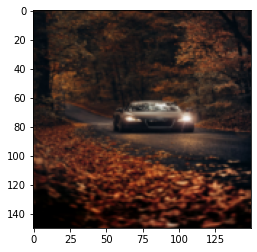

time: 41.4 s (started: 2021-04-19 13:24:06 +00:00)


In [94]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'  PREDICTED OUTPUT: {y_out}')
